<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
m_shape = movies.shape

print('The number of rows and columns: {}'.format(m_shape))

The number of rows and columns: (979, 6)


#### Check the data type of each column.

In [4]:
# Answer:
print('data type of each column:')
movies.dtypes

data type of each column:


star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
# Answer:
print('The average movie duration is:', movies.duration.mean())


The average movie duration is: 120.97957099080695


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
shortest_movie = movies.sort_values('duration', ascending=True).head(1).title.iloc[0]
longest_movie = movies.sort_values('duration', ascending=False).head(1).title.iloc[0]
print('Shortest movie:', shortest_movie)
print('Longest movie:', longest_movie)

Shortest movie: Freaks
Longest movie: Hamlet


#### Create a histogram of duration, choosing an "appropriate" number of bins.

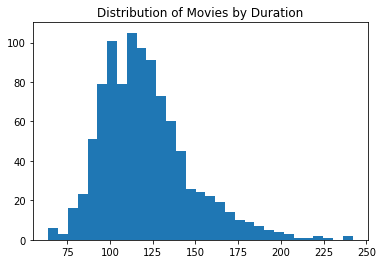

In [7]:
# Answer:
num_bins = len(movies.duration)**(1/2)
num_bins = round(num_bins)
movie_durations = plt.hist(movies['duration'], bins=num_bins)
plt.title('Distribution of Movies by Duration');
# movie_durations
# movie_durations.title'Distribution of Movies by Duration'

#### Use a box plot to display that same data.

Text(0.5,1,'Movie Durations')

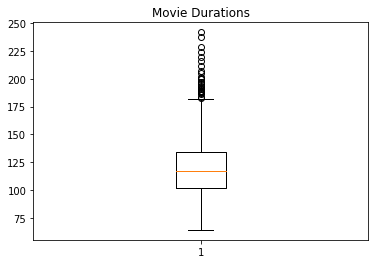

In [8]:
# Answer:
plt.boxplot(movies['duration']);
plt.title('Movie Durations')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'Num Movies')

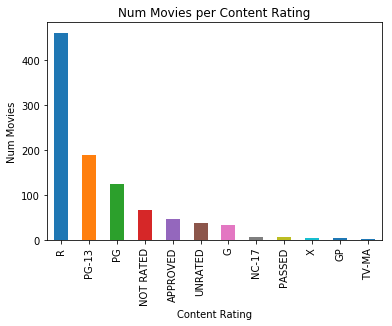

In [10]:
# Answer:

movies['content_rating'].value_counts().plot(kind='bar',title='Num Movies per Content Rating');
plt.xlabel('Content Rating')
plt.ylabel('Num Movies')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
movies.content_rating.replace(['X','TV-MA'], 'NC-17', inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
print(len(movies[movies.content_rating.isna()]))
movies.content_rating.fillna(value='PG-13', inplace=True)
print(len(movies[movies.content_rating.isna()]))

3
0


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
# Answer:
movies.head()
mean_long = movies[movies.duration>=120].star_rating.mean()
mean_short = movies[movies.duration<120].star_rating.mean()
print(mean_long, mean_short)

7.948898678414082 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

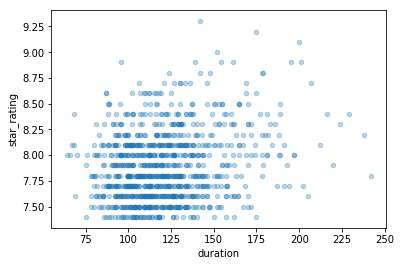

In [16]:
# Answer:
# Doesn't look like there's a clear relationship between duration and star rating.
movies.plot(kind='scatter',x='duration',y='star_rating',alpha=.3);

#### Calculate the average duration for each genre.

In [17]:
# Answer:
movies.head()
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

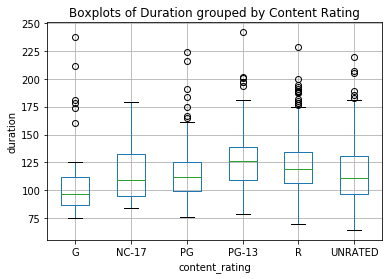

In [18]:
# Answer:

# Boxplot the duration of movies grouped by content rating

# It looksl ike the G rated films have a lower average duration, which makes sense 
# because most kids have lower attention spans than most adults so the movies need to be shorter.


movies.pivot(columns='content_rating',values='duration').boxplot()

plt.xlabel('content_rating')
plt.ylabel('duration')
plt.title('Boxplots of Duration grouped by Content Rating');


#### Determine the top rated movie (by star rating) for each genre.

In [19]:
# Answer:
print('Top Rated Movies by Star Rating')
movies.sort_values('star_rating',ascending=False).groupby('genre').first()

Top Rated Movies by Star Rating


,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
# Answer:

# Group movies by their title
m = movies.groupby('title')

# Filter for groups with more than 1 entry
same_titles = m.filter(lambda x: len(x) > 1).sort_values('title')

# looks like they are all different movies and not actually duplicates!
same_titles

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [21]:
# Answer:

# create list of genres with at least 10 movies. Using future answer as reference for the list.
genres = ['Crime', 'Action', 'Drama', 'Adventure', 'Biography', 'Comedy', 'Animation', 'Mystery', 'Horror']

# filter movies df by using genres list
m = movies[movies.genre.isin(genres)]

# compute the mean of star_rating by genre
m.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [22]:
# Answer:

# get total movie count per genre
genre_counts = movies.genre.value_counts()

# filter genre_counts for counts with 10 or more and save index
genres = genre_counts[genre_counts >= 10].index

# filter movies using list of genres
m = movies[movies.genre.isin(genres)]

m.groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [23]:
# Answer:

# caculate average star rating for all genres
m = movies.groupby('genre').star_rating.mean()

# create series that shows whether a genre has 10 or more movies
genres = movies.genre.value_counts() >= 10

# sort the genres in alphabetical order
genres_sorted = genres.sort_index()

# filter using boolean Series
m[genres_sorted]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [24]:
# Answer:

# group by genre and agg count, mean
m = movies.groupby('genre').star_rating.agg(['count', 'mean'])

# filter by count and sort by genre
m[m['count'] >= 10].sort_values('genre')

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [25]:
# get actor with highest movie ratings
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [28]:
cast = movies.actors_list.apply(lambda x: x[1:-1].split(','))

actors = []
for c in cast:
    for actor in c:
        actors.append(actor.strip())
a = pd.Series(actors)
a.value_counts().head()

# Rober De Niro was in the most movies.

u'Robert De Niro'    18
u'Clint Eastwood'    14
u'Tom Hanks'         14
u'Brad Pitt'         14
u'Al Pacino'         13
dtype: int64

In [27]:
# The average star_rating for Robert De Niro is 8.04
a2 = a.value_counts().index
a2
movies[movies.actors_list.str.contains(a2[0])].star_rating.mean()

8.044444444444444